<u><b><span style = "font-size:20.0pt">Python Webscraper </span><b><u>

    
***
<b><span style= "font-size: 14.0pt"> Objective for this project:</span></b> 
<span style= "font-size: 14.0pt">Find the most frequently drawn numbers and bonus numbers for lotto 6/49 given available public data. </span>
    

<b><span style = "font-size:14.0pt"> What will be used:</span><b>
    
    
    
    1. Python3
    2. Pandas
    3. Matplotlib
    4. Beautifulsoup
    


<b><span style= "font-size: 14.0pt"> Process: </span><b>
    
              

    1. Scrape the website: https://www.national-lottery.com/canada-6-49/results/2021-archive
    2. Load the available data into a CSV file
    3. Use Matplotlib to plot findings

<b><span style = "font-size:14.0pt">Installation:</span><b>

In [1]:
#pip install bs4
#pip install requests
#pip install matplotlib
#pip install html5lib
#pip install pandas

<b><span style = "font-size:14.0pt">Imports: </span><b>

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import html5lib

<b><span style = "font-size:14.0pt">Functions Used To Webscrape: </span><b>

In [3]:
def create_url(url, years): #Loops through all webpages
    urls = []
    for year in years:
        new_url = url + str(year) + '-archive'
        urls.append(new_url)
    return urls



def request_page(url): #Requesting html pages
    response = requests.get(url)
    return response

<b><span style = "font-size:14.0pt">Extracting Function:</span><b>

In [4]:
def extracting(data):

    pasta = BeautifulSoup(data, 'html.parser')
    lists = pasta.find_all('table', class_="table lotto mobFormat mobResult")#class is from the webpage
    df_list = pd.read_html(str(lists), flavor='bs4')
    df = pd.concat(df_list)  # making it so that you can add indexes
    new_df = df.drop(2)  # deleting the ad on the webpage

    return new_df

<b><span style = "font-size:14.0pt">Transformating Data Function:</span><b>
    
    1. The date format will now be in the format YYYY-(Full Name of Month)-DD. 
    2. There will be a new column called "Bonus" being created which is grabs the last element of the list

In [5]:
def format_date(new_df):
    new_df["Draw Date"] = pd.to_datetime(new_df["Draw Date"]) #converting the formats of the date
    new_df["Draw Date"] = new_df["Draw Date"].dt.strftime("%Y %B %-d")

def format_numbers(new_df):
    new_df["Bonus"] = new_df["Results"].apply(lambda x: x[-2:])  # getting the last element and creating a new column
    new_df["Results"] = new_df["Results"].apply(lambda x: x[:-2].split())


def final_format(new_df): #combining the above two functions
    format_date(new_df)
    format_numbers(new_df) 

<b><span style = "font-size:14.0pt">Renaming a data frame with the following columns: </span><b>

In [6]:
columns = ["Draw Date", "Results", "Bonus", "Jackpot", "Outcome"]

<b><span style = "font-size:14.0pt">Writing to CSV file</span><b>
    
    The function below will load the data into a csv file. 
    

In [7]:
def writing_to_csv(file, data):
    data_to_load = pd.DataFrame(data, columns= columns)
    data_to_load.to_csv(file, index=False)
    return data_to_load

<b><span style = "font-size:14.0pt">Finding The Most Frequent Numbers</span></b>
    
    The code below describes the actual process of scraping the website and then converting it into a
    csv file. 
    

In [8]:
file = "lotto_six_four_nine.csv" 
years = [x for x in range(2012, 2022)] #Only finding the numbers from 2012-2022
url = "https://www.national-lottery.com/canada-6-49/results/" #Website being scraped
hello = create_url(url, years)
blank = ""

for url in hello:
    blank += request_page(url).text
new_data = extracting(blank)
final_format(new_data)
writing_to_csv(file, new_data)
csv_path = "lotto_six_four_nine.csv"
final = pd.read_csv(csv_path)

<b><span style = "font-size:14.0pt">Functions Used To Store : </span><b>
    
A dictionary will be used such that the key represents the numebr and the value associated with the key represents the frequency at which the number is drawn. Due to the fact that number is not a list, we will run into a type error which is solved in the second half of the code in the storing_values function.
    

In [9]:
def storing_values(final, column): 
    dictionary = {}                    #storing the numbers as a dictionary
    try:
        for numbers in final[column].apply(eval):
            for num in numbers:
                if num not in dictionary:
                    dictionary[num] = 1
                else:
                    dictionary[num] +=1
        return dictionary
    except TypeError:                  
        for numbers in final[column]:
            if numbers not in dictionary:
                dictionary[numbers] = 1
            else:
                dictionary[numbers] += 1

        return dictionary
    
def reformatting_dictionary(dictionary, column):
    reformatted = pd.DataFrame(list(dictionary.items())) #listing the dataframe with two columns
    reformatted.columns = [column, 'Frequency'] 
    return reformatted


def sorting_numbers(dictionary, column):
    reformatted = reformatting_dictionary(dictionary, column)
    sort_frequency = reformatted.sort_values(by = "Frequency", ascending= False)
    sort_frequency.reset_index(drop=True, inplace=True)
    return sort_frequency

<b><span style = "font-size:14.0pt">Plotting Results: </span><b>

In [10]:
def create_plot(final, column): # function used to plot
    updated_data = storing_values(final, column)
    new_reset = sorting_numbers(updated_data, column)
    fig, ax = plt.subplots(figsize=(10.5, 8))
    ax = new_reset.plot(x= column , y="Frequency", kind="bar", ax=ax)
    fig.tight_layout()
    return plt.show()


Results1 = storing_values(final, "Results")
Sort = sorting_numbers(Results1, "Results")
print(Sort.head(5))


  Results  Frequency
0      45        152
1      38        148
2      21        142
3      22        141
4      23        140


<b><span style = "font-size:14.0pt">Most Frequent Bonus Numbers: </span><b>

   Bonus  Frequency
0      5         31
1      9         31
2      3         28
3     10         28
4     21         28


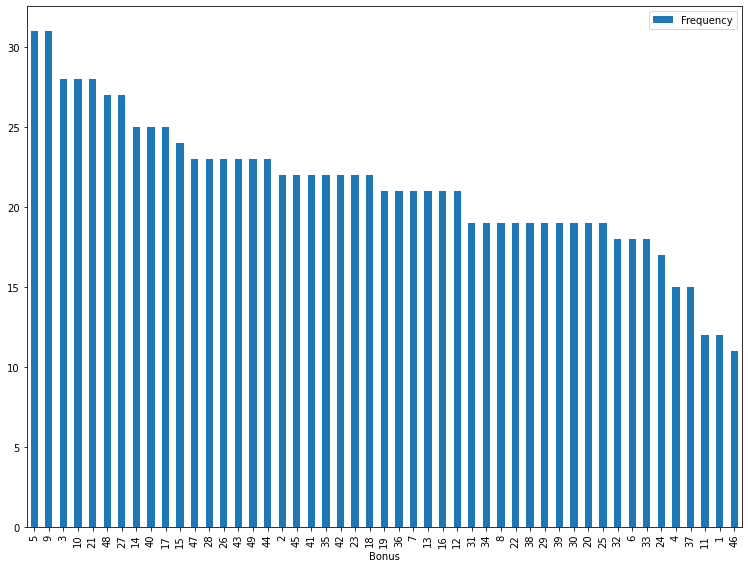

In [11]:

Results1 = storing_values(final, "Bonus")
Sort = sorting_numbers(Results1, "Bonus")
print(Sort.head(5))

create_plot(final, "Bonus")

<b><span style = "font-size:14.0pt">Final Remarks: </span><b>

The top numbers for the draws in Lotto 6/49 from 2012-2021 are 45, 38, 21, 22, and 23 and the top numbers for the bonus draw are 5,9,3,10, and 21.

Some other analysis that could have been done is figuring out if there was a specific day in the week where there are more more wins on Wednesday or Saturday draws. 